In [3]:
import random as rd
import pandas as pd
import math

Variant = 12
rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operands)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

'((((b*a)/a)*b)*c)'

In [ ]:
format ELF64

public _start

section '.bss' writable
  place db 1

section '.text' executable
print_dig:
    xor rbx, rbx     

    cmp rax, 9
    jle .single_digit       

    mov rcx, 10              
.loop:
    xor rdx, rdx            
    div rcx                
    push rdx                 
    inc rbx                  
    test rax, rax            
    jnz .loop                

.print_loop:
    pop rax                 
    add rax, '0'            
    mov [place], al         

    mov eax, 1               
    mov edi, 1             
    mov rsi, place       
    mov edx, 1             
    syscall

    dec rbx                
    jnz .print_loop         

    ret

.single_digit:
    add rax, '0'           
    mov [place], al         

    mov eax, 1         
    mov edi, 1              
    mov rsi, place          
    mov edx, 1               
    syscall
    ret

_start:
    pop rcx
    cmp rcx, 2
    jl .no_arg             

    mov rsi, [rsp + 8]     
    movzx rax, byte [rsi]  
    call print_dig          
    mov eax, 60             
    xor edi, edi           
    syscall

.no_arg:
    mov eax, 60           
    xor edi, edi            
    syscall

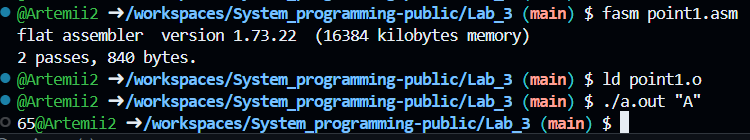